In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation 
from tensorflow.keras.optimizers import Adam
import seaborn as sns

In [2]:
model = Sequential([
    Dense(20, input_dim=10, activation='relu'),
    Dense(20, activation='relu'),
    Dense(2, activation='softmax')
])

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=1, min_delta=0.001)
model.compile(Adam(lr=.0005), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

xtrain = pd.read_csv("X_train.csv").to_numpy()
ytrain = pd.read_csv("y_train.csv").to_numpy().flatten()

xtest = pd.read_csv("X_test.csv").to_numpy()
ytest = pd.read_csv("y_test.csv").to_numpy().flatten()    
    
model.summary()

history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), callbacks=[callback], epochs=100, batch_size=64)

def predict_model(input):
    inputr = model(input.reshape(1, 10))[0]
    classes = sorted(np.unique(ytrain))
    prediction = classes[np.argmax(inputr)]
    return prediction
    
guesses = np.array([predict_model(i) for i in xtest])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 2)                 42        
                                                                 
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
2/2 [==============================] - 1s 499ms/step - loss: 0.7416 - accuracy: 0.3280 - val_loss: 0.7148 - val_accuracy: 0.3519
Epoch 2/100
2/2 [==============================] - 0s 51ms/step - loss: 0.7294 - accuracy: 0.3280 - val_loss: 0.7038 - val_accuracy: 0.3519
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 0.7175 - accuracy: 0.3280 - val_loss: 0.6930 - val_accuracy: 0.3519
Epoch 4/100
2/2 [==============================] - 0s 66ms/step - loss: 0.7058 - accuracy: 0.3280 - val_loss: 0.6827 - val_accuracy: 0.3519
Epoch 5/100
2/2 [==============================] - 0s 38ms/step - loss: 0.6944 - accuracy: 0.3280 - val_loss: 0.6727 - val_accuracy: 0.3519
Epoch 6/100
2/2 [==============================] - 0s 57ms/step - loss: 0.6837 - accuracy: 0.3280 - val_loss: 0.6630 - val_accuracy: 0.3519
Epoch 7/100
2/2 [==============================] - 0s 51ms/step - loss: 0.6734 - accuracy: 0.3280 - val_loss: 0.6534 - val_accuracy: 0.3519
Epoch 8/100
2/2 [==

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import sklearn.model_selection as model_selection
from sklearn import metrics


def get_scores(acc, labels, prediction):
    f1 = metrics.f1_score(labels, prediction)
    conf_matrix = metrics.confusion_matrix(labels, prediction)
    sens = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    spec = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    auc = metrics.roc_auc_score(labels, prediction)
    return sens, spec, f1, auc, acc


acc = accuracy_score(ytest, guesses)
sens, spec, f1, AUC, acc = get_scores(acc, ytest, guesses)
values = [sens, spec, f1, AUC, acc]
print(values)

[1.0, 1.0, 1.0, 1.0, 1.0]


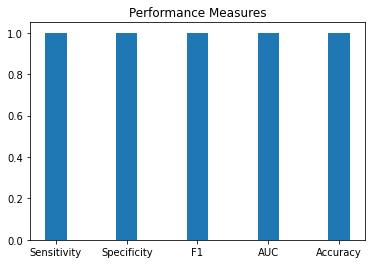

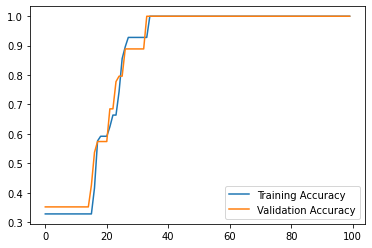

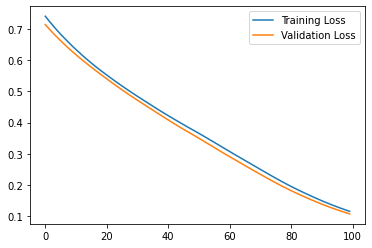

In [4]:
labels = ["Sensitivity", "Specificity", "F1", "AUC", "Accuracy"]
plt.title("Performance Measures")
width =0.3
plt.xticks(range(len(labels)), labels)
plt.bar(np.arange(len(values)), values, width=width)
plt.show()

def summarize_diagnostics(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

_, acc = model.evaluate(xtest, verbose=0)
summarize_diagnostics(history)